# Deaths and Births

Getting datasets list: 100%|██████████| 213/213 [00:00<00:00, 733.22it/s]
!!! Token missing, please check your credentials on api.insee.fr !!!
!!! Please do the following to use your credentials : 
import os
os.environ['insee_key'] = 'my_key'
os.environ['insee_secret'] = 'my_secret_key'
!!! If your token still does not work, please try to use pynsee.utils.clear_all_cache !!!
SDMX web service used instead of API
1/1 - Getting series: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]
Data has been cached



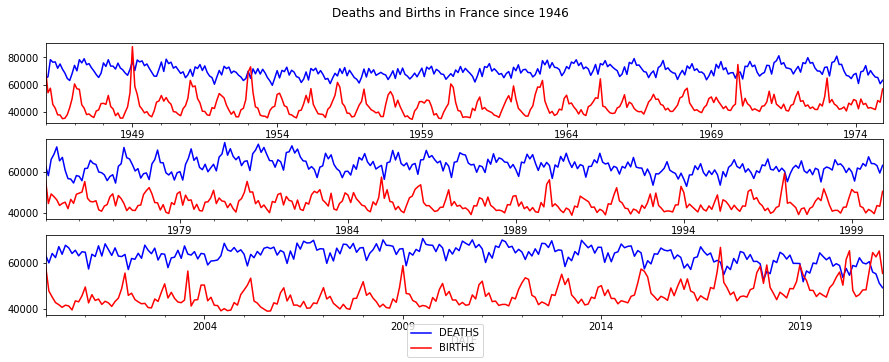

In [1]:
from pynsee.macrodata import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 
# Beware : any change to the keys should be tested in a new python session
#os.environ['insee_key'] = "my_insee_key"
#os.environ['insee_secret'] = "my_insee_secret"

insee_data = get_dataset_list()

df_idbank = get_idbank_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_insee_idbank(df_idbank.idbank)

data = split_title(data)

data['period'] = np.select([(data.index < '1975-01-01'),
                            (data.index >= '1975-01-01') & (data.index < '2000-01-01'),
                            (data.index >= '2000-01-01')],
                            ['1946 - 1974', '1975 - 1999', '2000 - today'])

data = data.reset_index()

death = data[data.IDBANK=="000436391"]
death = death.rename(columns={"OBS_VALUE":"DEATHS"})
birth = data[data.IDBANK=="000436394"]
birth = birth.rename(columns={"OBS_VALUE":"BIRTHS"})

#plot
fig, axes = plt.subplots(3,1, figsize=(15,5))
plt.suptitle("Deaths and Births in France since 1946")

for (period, group), ax in zip(death.groupby(death.period), axes.flatten()):
    group.plot(x='DATE', y='DEATHS', kind='line',
               ax=ax, color="blue", legend=False)
    
for (period, group), ax in zip(birth.groupby(birth.period), axes.flatten()):
    group.plot(x='DATE', y='BIRTHS', kind='line',
               ax=ax, color="red", legend=False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')